haarcascade_* のある場所

/usr/local/lib/python3.6/dist-packages/cv2/data/haarcascade_licence_plate_rus_16stages.xml

In [1]:
!ls /usr/local/lib/python3.6/dist-packages/cv2/data

haarcascade_eye_tree_eyeglasses.xml
haarcascade_eye.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalcatface.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml
__init__.py
__pycache__


In [2]:
!curl -O https://www.asahicom.jp/articles/images/AS20190401004285_comm.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  102k  100  102k    0     0  93090      0  0:00:01  0:00:01 --:--:-- 93007


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [0]:
OPENCVDIR = "/usr/local/lib/python3.6/dist-packages/cv2/data/"

face_cascade = cv2.CascadeClassifier(OPENCVDIR + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(OPENCVDIR + 'haarcascade_eye.xml')

In [0]:
img = cv2.imread('AS20190401004285_comm.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
!ls

AS20190401004285_comm.jpg  haarcascade_frontalface_default.xml	test-data
haarcascade_eye.xml	   sample_data				training-data


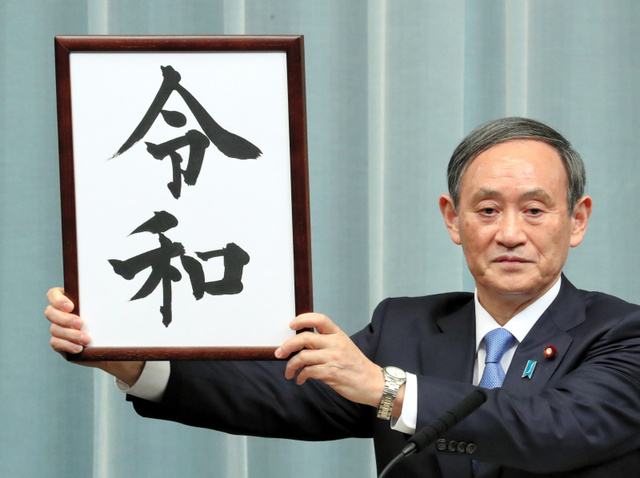

In [7]:
cv2_imshow(img)

In [8]:
# faces = face_cascade.detectMultiScale(gray, minSize = (100, 100))
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

[[441 153 142 142]]


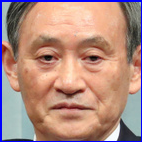

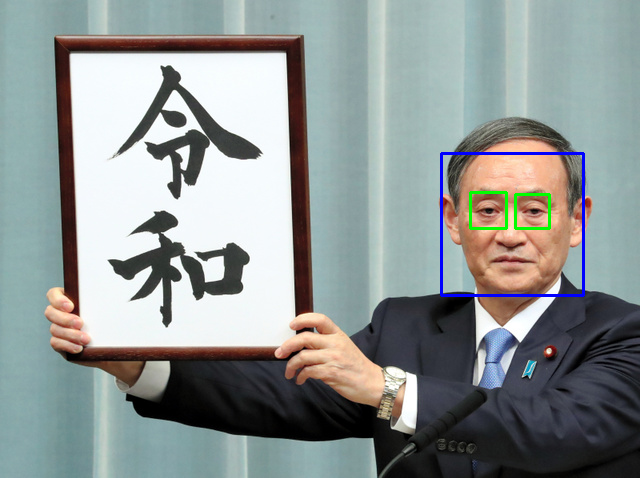

In [9]:
blue = (255,0,0)
green = (0,255,0)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), blue, 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cv2_imshow(roi_color)
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), green, 2)

cv2_imshow(img)

In [0]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [11]:
!mkdir training-data
!mkdir training-data/s1
!mkdir training-data/s2
!mkdir test-data

mkdir: cannot create directory ‘training-data’: File exists
mkdir: cannot create directory ‘training-data/s1’: File exists
mkdir: cannot create directory ‘training-data/s2’: File exists
mkdir: cannot create directory ‘test-data’: File exists


In [12]:
# s1
!curl -o training-data/s1/1.jpg http://p.imgci.com/db/PICTURES/CMS/117500/117502.jpg
!curl -o training-data/s1/2.jpg https://www.samaa.tv/wp-content/uploads/2017/07/Ramiz-Raja.jpg
!curl -o training-data/s1/3.jpg https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-1p1aaf05i166fl09rvafptv1v2-20170213120221.Medi.jpeg
!curl -o training-data/s1/4.jpg http://www.fakingnews.com/wp-content/uploads/2018/09/159864_1481328_updates-620x354.jpg
!curl -o training-data/s1/5.jpg https://www.brandsynario.com/wp-content/uploads/2017/08/Ramiz-Raja.jpg
!curl -o training-data/s1/6.jpg https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/05/27/Pictures/mcc-world-cricket-committee-press-conference_c2cd73b6-6190-11e8-b354-8e7f0da49342.jpg
!curl -o training-data/s1/7.jpg https://sportzwiki.com/wp-content/uploads/2016/06/Cricket-fan-paid-tribute01271697_201582155534.jpg
!curl -o training-data/s1/8.jpg https://static.toiimg.com/thumb/imgsize-7753,msid-15871697,width-400,resizemode-4/15871697.jpg
!curl -o training-data/s1/9.jpg https://www.pakistankakhudahafiz.com/pkkhnew/wp-content/uploads/2017/03/l_133552_070712_updates.jpg
!curl -o training-data/s1/10.jpg https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-6v47mdplrmdve4d4nnlr4albk6-20170201130354.Medi.jpeg
!curl -o training-data/s1/11.jpg https://i.ytimg.com/vi/k6Uovs5M-UQ/maxresdefault.jpg
!curl -o training-data/s1/12.jpg http://www.brecorder.com/wp-content/uploads/2017/07/raja-1024.jpg

# s2
!curl -o training-data/s2/1.jpg https://media1.popsugar-assets.com/files/thumbor/8jz2qyMZDuMIrPQpg3ykc2iXsJo/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2017/08/10/748/n/1922398/tmp_KmXOpO_7dbb0d56aa4849ac_main.jpg
!curl -o training-data/s2/2.jpg https://upload.wikimedia.org/wikipedia/commons/6/6e/YoungElvisPresley.jpg
!curl -o training-data/s2/3.jpg https://media.vanityfair.com/photos/58f1226e50cecc47a7701b89/master/w_768,c_limit/elvis-presley.jpg
!curl -o training-data/s2/4.jpg https://nme-jp.com/nmesite/wp-content/uploads/2015/11/2014ElvisPresley_Getty74290869_100414-720x480.jpg
!curl -o training-data/s2/5.jpg https://static.spin.com/files/2018/02/GettyImages-517481022-1519839551-640x398.jpg
!curl -o training-data/s2/6.jpg https://elvisthemusic.com/wp-content/themes/elvis/images/default.jpg
!curl -o training-data/s2/7.jpg https://stat.ameba.jp/user_images/20190207/21/mayu1117/e2/e1/j/o1200120014352229663.jpg
!curl -o training-data/s2/8.jpg https://www.famousbirthdays.com/faces/presley-elvis-image.jpg
!curl -o training-data/s2/9.jpg https://www.grammy.com/sites/com/files/styles/image_landscape_hero/public/elvis_presley_hero_74290646.jpg
!curl -o training-data/s2/10.jpg https://imgc.allpostersimages.com/img/print/posters/jailhouse-rock-elvis-presley-1957_a-G-5098066-8363144.jpg
!curl -o training-data/s2/11.jpg http://www.110107.com/files/6/freepage/elvis_searcher/img/elvis.png
!curl -o training-data/s2/12.jpg https://media1.popsugar-assets.com/files/thumbor/bX3nXczBOV9P3rHO5gveX9ZlG9c/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2017/08/10/911/n/1922398/3caeaea4598cc7699a5990.54245676_edit_img_cover_file_16360412_1502391174/i/Elvis-Presley-Pictures.jpg

# test
!curl -o training-data/s2/10.jpg https://imgc.allpostersimages.com/img/print/posters/jailhouse-rock-elvis-presley-1957_a-G-5098066-8363144.jpg
!curl -o training-data/s2/5.jpg https://static.spin.com/files/2018/02/GettyImages-517481022-1519839551-640x398.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 78127  100 78127    0     0  93453      0 --:--:-- --:--:-- --:--:-- 93453
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 68415  100 68415    0     0  40126      0  0:00:01  0:00:01 --:--:-- 40102
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32519  100 32519    0     0   6179      0  0:00:05  0:00:05 --:--:--  7034
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27892  100 27892    0     0  42713      0 --:--:-- --:--:-- --:--:-- 42648
  % Total    % Received % Xferd  Average Speed   Tim

In [0]:
# 学習済みデータの認識テスト用
!cp training-data/s1/1.jpg test-data/
!cp training-data/s2/1.jpg test-data/

In [14]:
!ls -lR training-data test-data

test-data:
total 1452
-rw-r--r-- 1 root root  18839 Apr 12 07:04 10.jpg
-rw-r--r-- 1 root root 901799 Apr 12 07:04 11.jpg
-rw-r--r-- 1 root root 180268 Apr 12 07:14 1.jpg
-rw-r--r-- 1 root root  27892 Apr 12 07:04 4.jpg
-rw-r--r-- 1 root root 220049 Apr 12 05:25 test1.jpg
-rw-r--r-- 1 root root 126055 Apr 12 05:26 test2.jpg

training-data:
total 8
drwxr-xr-x 2 root root 4096 Apr 12 04:53 s1
drwxr-xr-x 2 root root 4096 Apr 12 05:01 s2

training-data/s1:
total 612
-rw-r--r-- 1 root root  32997 Apr 12 07:13 10.jpg
-rw-r--r-- 1 root root 104335 Apr 12 07:13 11.jpg
-rw-r--r-- 1 root root  78185 Apr 12 07:13 12.jpg
-rw-r--r-- 1 root root  78127 Apr 12 07:13 1.jpg
-rw-r--r-- 1 root root  68415 Apr 12 07:13 2.jpg
-rw-r--r-- 1 root root  32519 Apr 12 07:13 3.jpg
-rw-r--r-- 1 root root  27892 Apr 12 07:13 4.jpg
-rw-r--r-- 1 root root  65566 Apr 12 07:13 5.jpg
-rw-r--r-- 1 root root  34604 Apr 12 07:13 6.jpg
-rw-r--r-- 1 root root  40706 Apr 12 07:13 7.jpg
-rw-r--r-- 1 root root  13353 Apr 12 07:

In [0]:
subjects = ["", "Ramiz Raja", "Elvis Presley"]

In [0]:
OPENCVDIR = "/usr/local/lib/python3.6/dist-packages/cv2/data/"

def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(OPENCVDIR + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return None, None
    (x, y, w, h) = faces[0]
    return gray[y:y+w, x:x+h], faces[0]

In [0]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue;
        label = int(dir_name.replace("s", ""))
        subject_dir_path = data_folder_path + "/" + dir_name
        subject_images_names = os.listdir(subject_dir_path)

        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue;
            image_path = subject_dir_path + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not None:
                faces.append(face)
                labels.append(label)
                
                cv2_imshow(face)
                print(image_name)
            
    return faces, labels

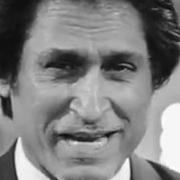

11.jpg


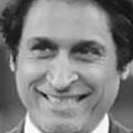

9.jpg


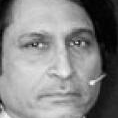

10.jpg


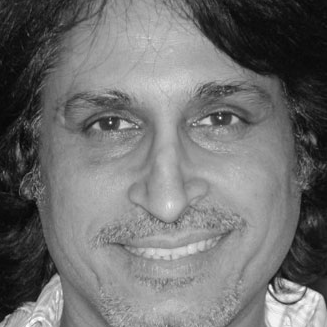

1.jpg


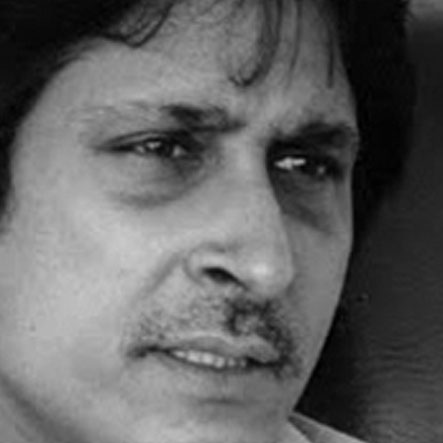

12.jpg


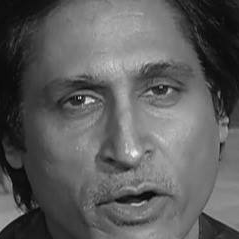

7.jpg


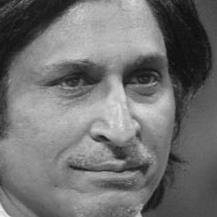

2.jpg


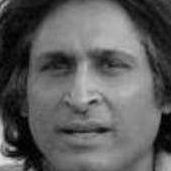

8.jpg


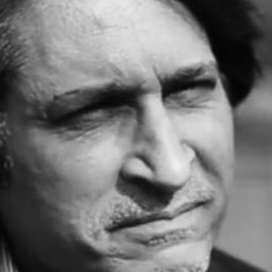

5.jpg


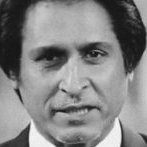

4.jpg


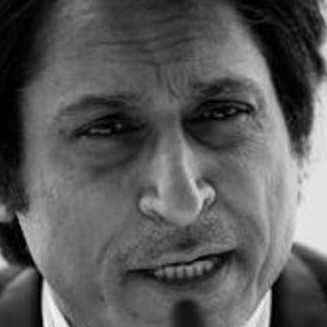

6.jpg


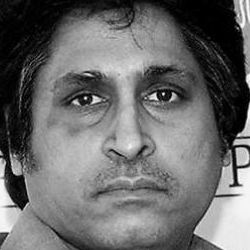

3.jpg


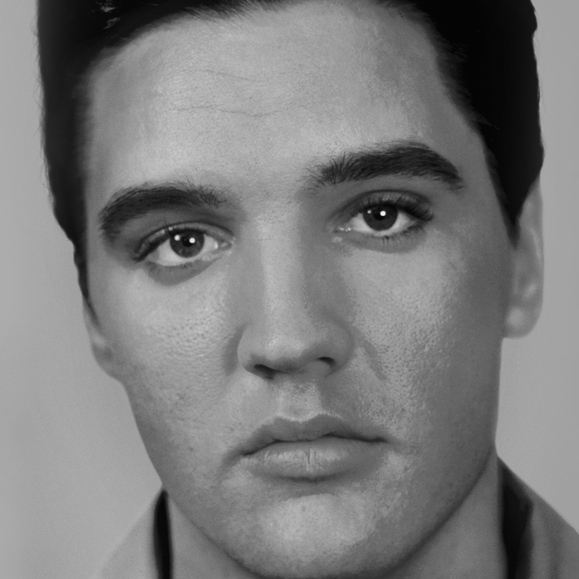

11.jpg


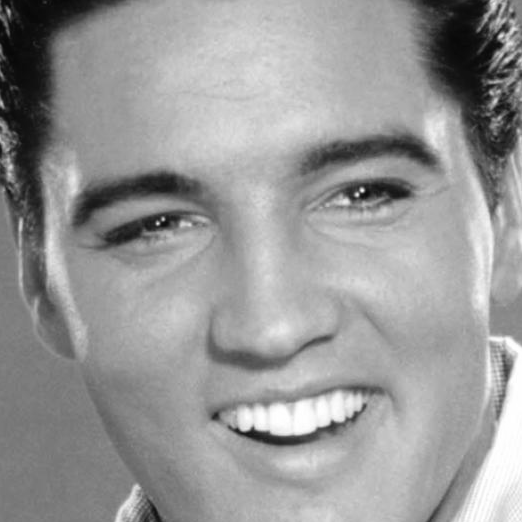

9.jpg


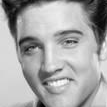

10.jpg


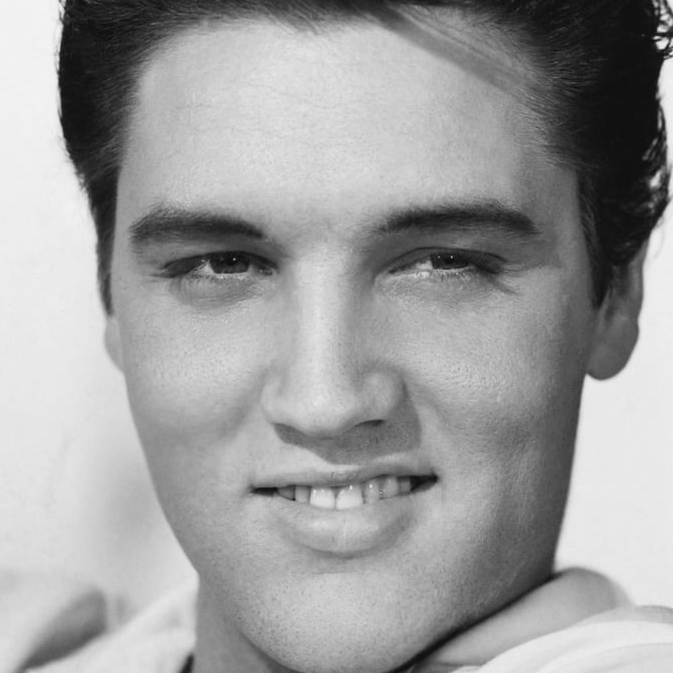

1.jpg


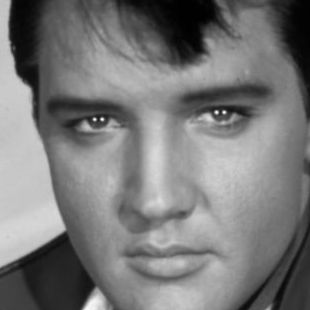

12.jpg


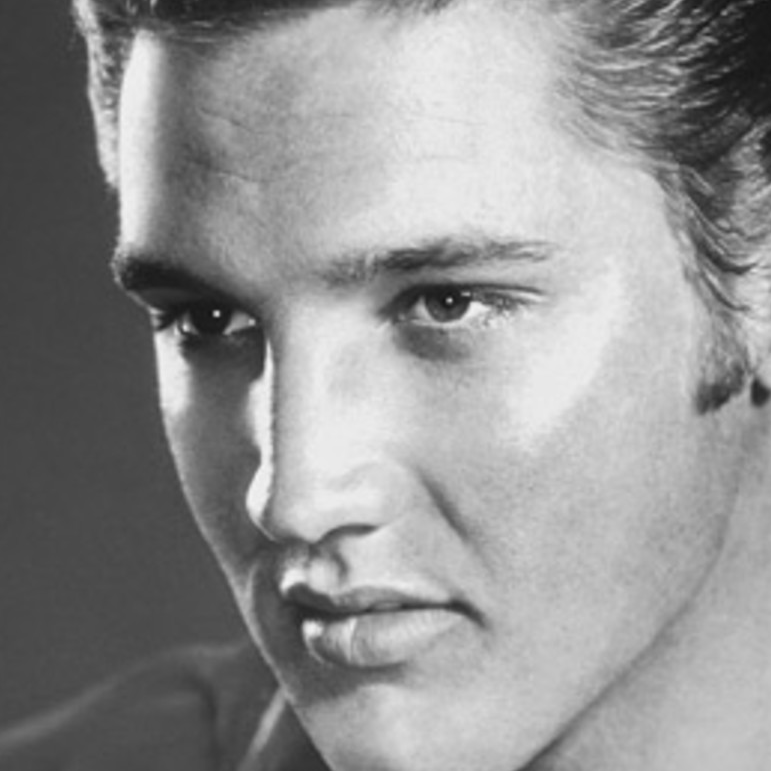

7.jpg


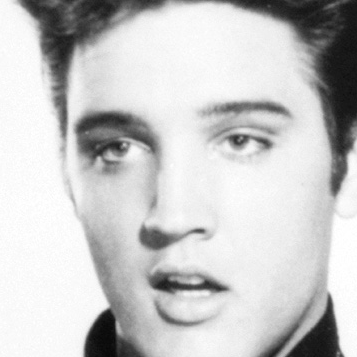

2.jpg


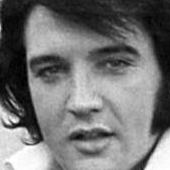

8.jpg


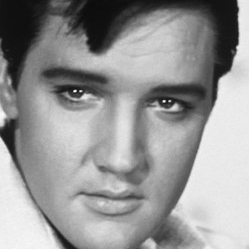

5.jpg


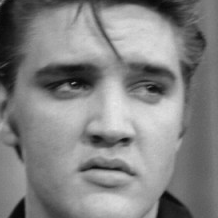

4.jpg


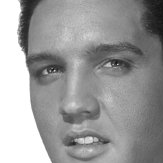

6.jpg


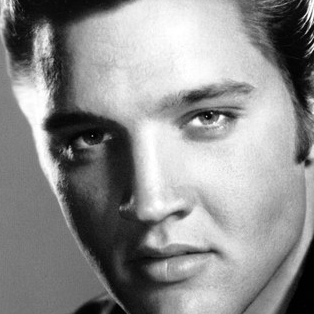

3.jpg
Total faces:  24
Total labels:  24


In [18]:
faces, labels = prepare_training_data("training-data")
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

In [0]:
# LBPH face recognizer 
face_recognizer = cv2.face_LBPHFaceRecognizer.create()

# EigenFaceRecognizer と FisherFaceRecognizer 画像サイズが違うとエラー

# EigenFaceRecognizer 
#face_recognizer = cv2.face_EigenFaceRecognizer.create()

# FisherFaceRecognizer
#face_recognizer = cv2.face_FisherFaceRecognizer.create()

face_recognizer.train(faces, np.array(labels))

In [0]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

def predict(test_img):
    img = test_img.copy()
    face, rect = detect_face(img)

    label= face_recognizer.predict(face)
    label_text = subjects[label[0]] + " " + str(label[1])
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

In [21]:
subject_dir_path = "test-data"
subject_images_names = os.listdir(subject_dir_path)
for image_name in subject_images_names:
    if image_name.startswith("."):
        continue;
    image_path = subject_dir_path + "/" + image_name

    image = cv2.imread(image_path)
    predicted = predict(image)
    cv2_imshow(predicted)


Output hidden; open in https://colab.research.google.com to view.